
CAPSTONE NLP2

PROBLEM STATEMENT

• DOMAIN: Industrial safety. NLP based Chatbot.

• CONTEXT:

The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

• DATA DESCRIPTION: This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.

Columns description:

‣ Data: timestamp or time/date information

‣ Countries: which country the accident occurred (anonymised)

‣ Local: the city where the manufacturing plant is located (anonymised)

‣ Industry sector: which sector the plant belongs to

‣ Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)

‣ Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)

‣ Gender: if the person is male of female

‣ Employee or Third Party: if the injured person is an employee or a third party

‣ Critical Risk: some description of the risk involved in the accident

‣ Description: Detailed description of how the accident happened.

Link to download the dataset: https://drive.google.com/file/d/1_GmrRP1S2OIa02KlfOBNkYa8uxazGbfE/view?usp=sharing,

Original dataset link: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database

• PROJECT OBJECTIVE:

Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description.

• PROJECT TASK: [ Duration: 6 weeks, Score: 100 points]

1. Milestone 1: [ Duration: 2 weeks, Score: 20 points]

‣ Input: Interim report

‣ Process:

‣ Step 1: Import the data

‣ Step 2: Data cleansing

‣ Step 3: Data preprocessing

‣ Step 4: Data preparation to be used for AIML model learning

‣ Output: Clean data as .xlsx or .csv file to be used for AIML model learning

2. Milestone 2: [ Duration: 2 weeks, Score: 20 points]

‣ Input: Output of milestone 1

‣ Process:

‣ Step 1: NLP pre processing

‣ Step 2: Design, train and test machine learning classifiers

‣ Step 3: Design, train and test Neural networks classifiers

‣ Step 4: Design, train and test RNN or LSTM classifiers

‣ Step 5: Choose the best performing model classifier and pickle it.

‣ Output: Pickled model to be used for future prediction

‣ Submission: Interim report

3. Milestone 3: [ Duration: 2 weeks, Score: 60 points]

‣ Input: Pickled model from milestone 2 ‣ Process: [ 15 points ] ‣ Step 1: Design a clickable UI which can automate tasks performed under milestone 1 [ 5 points ] ‣ Step 2: Design a clickable UI which can automate tasks performed under milestone 2 [ 5 points ] ‣ Step 3: Design a clickable UI based chatbot interface [ 5 points ] ‣ Output: Clickable UI based chatbot interface which accepts text as input and replies back with relevant answers. ‣ Submission: Final report [ 45 points ]

‣ Hints:

‣ Please refer to the blog to understand the basic designing and functioning of chatbots: https://www.mygreatlearning.com/blog/basics-of-building-an-artificial-intelligence-chatbot/ ‣ To make GUI as a desk app you can use TKINTER library. ‣ To make web service GUI you can use FLASK or DJANGO library.

In [32]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import holoviews as hv
from holoviews import opts

In [3]:
from google.colab import drive
import os

In [4]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
os.getcwd()
projectpath = '/content/drive/MyDrive/ColabNotebooks/CapstoneProject'
path = os.path.join(projectpath,'Data Set - industrial_safety_and_health_database_with_accidents_description.csv')
path

'/content/drive/MyDrive/ColabNotebooks/CapstoneProject/Data Set - industrial_safety_and_health_database_with_accidents_description.csv'

In [6]:
# Read the data from the csv file and save the original for future use
industry_df = pd.read_csv(path)
actualData= industry_df.copy()

In [7]:
industry_df

,Unnamed: 0,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,01-01-16 0:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,02-01-16 0:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,06-01-16 0:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,08-01-16 0:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,10-01-16 0:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...,...
420,434,04-07-17 0:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
421,435,04-07-17 0:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
422,436,05-07-17 0:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
423,437,06-07-17 0:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...


In [8]:
print("Number of rows = {0} and Number of Columns = {1} in the Data frame".format(industry_df.shape[0], industry_df.shape[1]))

Number of rows = 425 and Number of Columns = 11 in the Data frame


In [12]:
industry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Date                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


Country , local , Industry sector, accidental :evel , potential accident level and Employee or third party all are cateogorical column. it needs to be changed.

In [13]:
#  First remove the index coulmn which is not required 
industry_df.drop("Unnamed: 0", axis=1, inplace=True)

# Rename 'Data', 'Countries', 'Genre', 'Employee or Third Party' columns in Data frame
industry_df.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)

# Get the top 2 rows
industry_df.head(2)


,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
0,01-01-16 0:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,02-01-16 0:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...


In [14]:
# Check whether data has anyduplicate records 
print(industry_df.duplicated().sum())


7


There are 7 duplicates records in the dataframe.Lets drop it first.

In [24]:
# Drop duplicates records 
industry_df = industry_df.drop_duplicates()

In [25]:
print("Number of rows = {0} and Number of Columns = {1} in the Data frame".format(industry_df.shape[0], industry_df.shape[1]))

Number of rows = 418 and Number of Columns = 10 in the Data frame


In [16]:
# Now check for null values 
industry_df.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee type               0
Critical Risk               0
Description                 0
dtype: int64

In [20]:
# Check unique values of all columns except 'Description' column
for x in industry_df.columns:
    if x != 'Description' and x != 'Date':
      print('--'*30); print(f'Unique values of "{x}" column'); print('--'*30)
      print(industry_df[x].unique())
      print('\n')

------------------------------------------------------------
Unique values of "Country" column
------------------------------------------------------------
['Country_01' 'Country_02' 'Country_03']


------------------------------------------------------------
Unique values of "Local" column
------------------------------------------------------------
['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']


------------------------------------------------------------
Unique values of "Industry Sector" column
------------------------------------------------------------
['Mining' 'Metals' 'Others']


------------------------------------------------------------
Unique values of "Accident Level" column
------------------------------------------------------------
['I' 'IV' 'III' 'II' 'V']


------------------------------------------------------------
Unique values of "Potential Accident Level" column
------------


There are only three country types.

There are 12 Local cities where manufacturing plant is located and it's types are in sequence so there are no outliers in 'Local' column.

There are only three Industry Sector types which are in sequence.

There are only five Accident Level types which are in sequence.

There are only six Potential Accident Level types. 

There are only two Gender types in the provided data.

There are only three Employee types in the provided data.

There are no null value in the data set

Data Cleansing summary:-

Removed 'Unnamed: 0' column and renamed - 'Data', 'Countries', 'Genre', 'Employee or Third Party' columns in the dataset.
We had 7 duplicate instances in the dataset and dropped those duplicates.
No missing values in dataset.
We are left with 418 rows and 10 columns after data cleansing.

In [27]:
industry_df['Date'] = pd.to_datetime(industry_df['Date'])

industry_df['Year'] = industry_df.Date.apply(lambda x : x.year)
industry_df['Month'] = industry_df.Date.apply(lambda x : x.month)
industry_df['Day'] = industry_df.Date.apply(lambda x : x.day)
industry_df['Weekday'] = industry_df.Date.apply(lambda x : x.day_name())
industry_df['WeekofYear'] = industry_df.Date.apply(lambda x : x.weekofyear)

industry_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Weekday,Day,WeekofYear
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,Friday,1,53
1,2016-02-01,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,2,Monday,1,5
2,2016-06-01,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,6,Wednesday,1,22
3,2016-08-01,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,8,Monday,1,31
4,2016-10-01,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,10,Saturday,1,39


Univariate Analysis

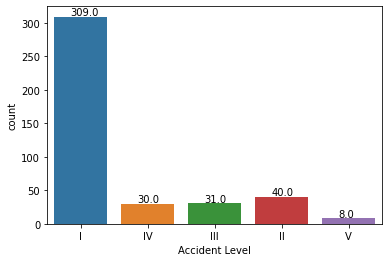

In [38]:

ax = sns.countplot(x="Accident Level", data=industry_df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+2))

plt.show()

Accident level 1 is the most occured accident level in the data set and Accident V is least occured accident. 

The number of accidents decreases as the Accident Level increases.


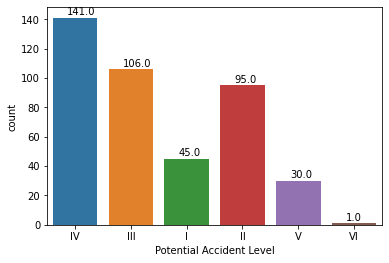

In [39]:
ax = sns.countplot(x="Potential Accident Level", data=industry_df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+2))

plt.show()

<-->

Accident level 4 is the most occured potential accident level in th dataset. There is only record for the potential level 6 which can be changed to level 5.

The number of accidents increases as the Potential Accident Level increases.

Let check the data country wise

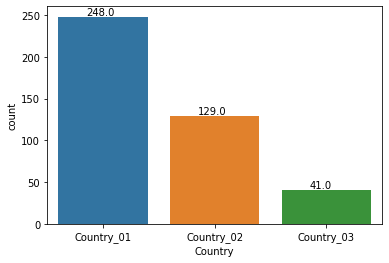

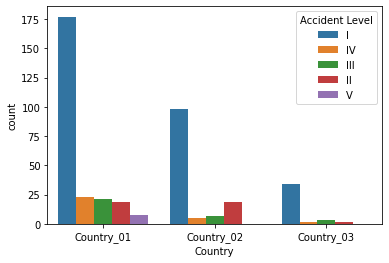

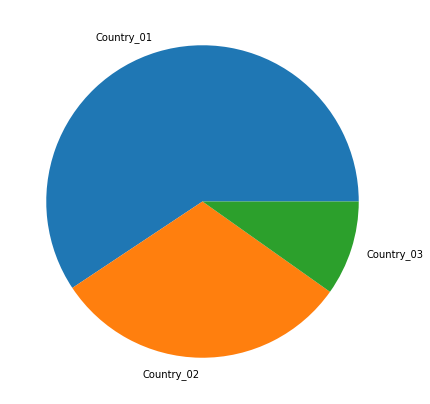

In [44]:
#  see the countries count
ax = sns.countplot(x="Country", data=industry_df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+2))
plt.show()

ax = sns.countplot(x="Country", data=data, hue = data['Accident Level'])
plt.show()

plt.figure(figsize=(7,10))
plt.pie(data['Country'].value_counts(), labels=['Country_01','Country_02','Country_03']);

Most impacted country is country1 with the count 248

In [35]:

local_cnt = np.round(industry_df['Local'].value_counts(normalize=True) * 100)
hv.extension('bokeh')
hv.Bars(local_cnt).opts(title="Local Count", color="#888000", xlabel="Locals", ylabel="Percentage", yformatter='%d%%')\
                .opts(opts.Bars(width=700, height=300,tools=['hover'],show_grid=True))

Output hidden; open in https://colab.research.google.com to view.

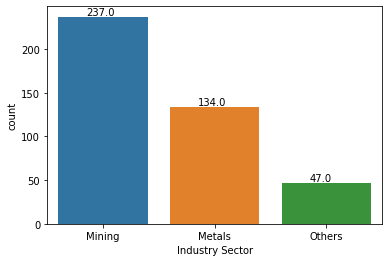

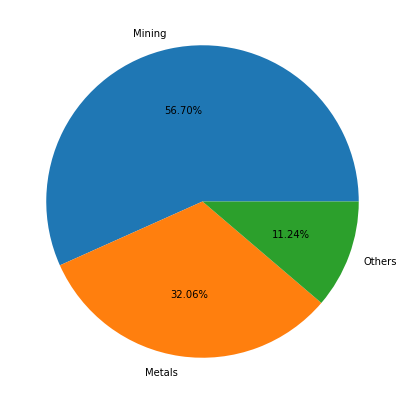

In [43]:
# Lets analyse the industry sector
ax = sns.countplot(x="Industry Sector", data=industry_df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+2))
plt.show()

plt.figure(figsize=(7,10))
plt.pie(data['Industry Sector'].value_counts(), labels=['Mining', 'Metals', 'Others'],autopct = '%1.2f%%');

Mining is the most impacted sector with the highest percentage of 56.70%

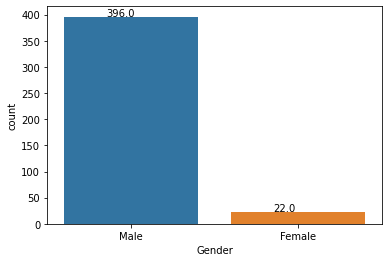

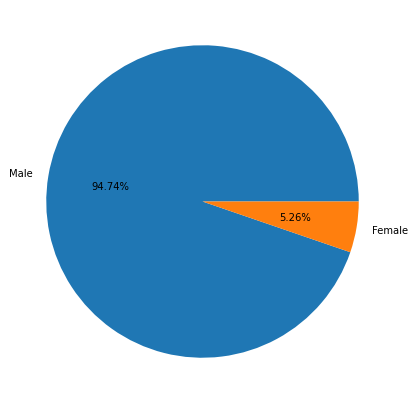

In [47]:
ax = sns.countplot(x="Gender", data=industry_df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+2))
plt.show()

plt.figure(figsize=(7,10))
plt.pie(data['Gender'].value_counts(), labels=['Male', 'Female'],autopct = '%1.2f%%');

Male is most affetced worker

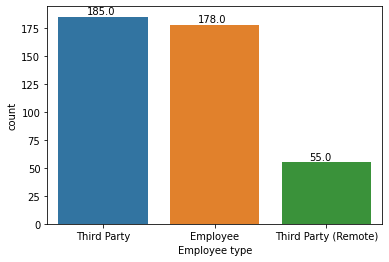

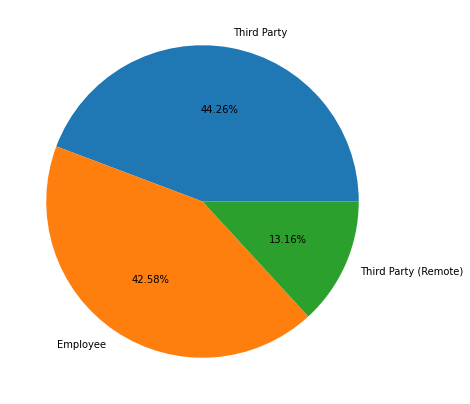

In [55]:

ax = sns.countplot(x="Employee type", data= industry_df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+2))
plt.show()

plt.figure(figsize=(7,10))
plt.pie(data['Employee type'].value_counts(), labels=['Third Party', 'Employee', 'Third Party (Remote)'],autopct = '%1.2f%%');

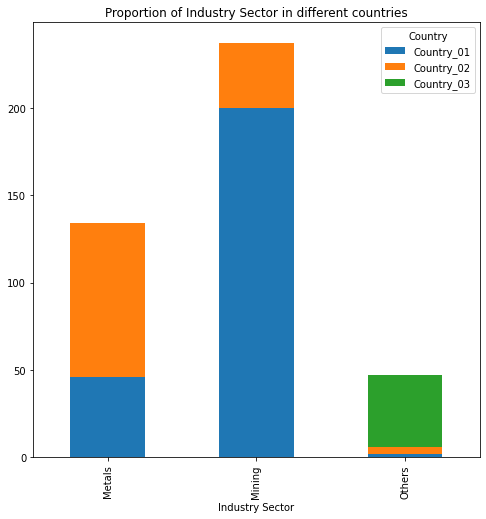

In [62]:
# Check the proportion of Industry sector in different countries
indsec_cntry_table = pd.crosstab(index = industry_df['Industry Sector'], columns = industry_df['Country'])
indsec_cntry_table.plot(kind = 'bar', figsize=(8,8), stacked = True)
plt.title("Proportion of Industry Sector in different countries")
plt.show()

Metals and Mining industry sector plants are not available in Country_03.


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

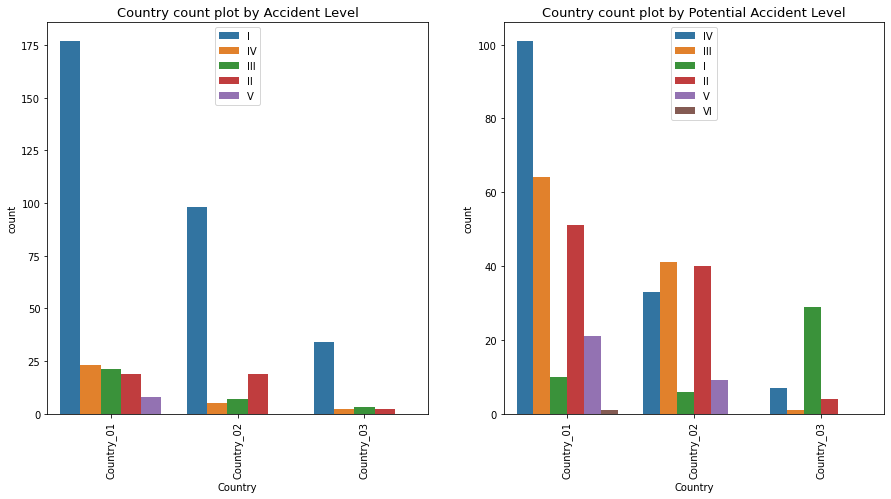

In [64]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(121)
sns.countplot(x = 'Country', data = industry_df, ax = ax, orient = 'v',
                  hue = 'Accident Level').set_title('Country'.capitalize() +' count plot by Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = data['Accident Level'].unique())
plt.xticks(rotation = 90)
    
ax = fig.add_subplot(122)
sns.countplot(x ='Country' , data = industry_df, ax = ax, orient = 'v', 
                  hue = 'Potential Accident Level').set_title('Country'.capitalize() +' count plot by Potential Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = data['Potential Accident Level'].unique())
plt.xticks(rotation = 90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

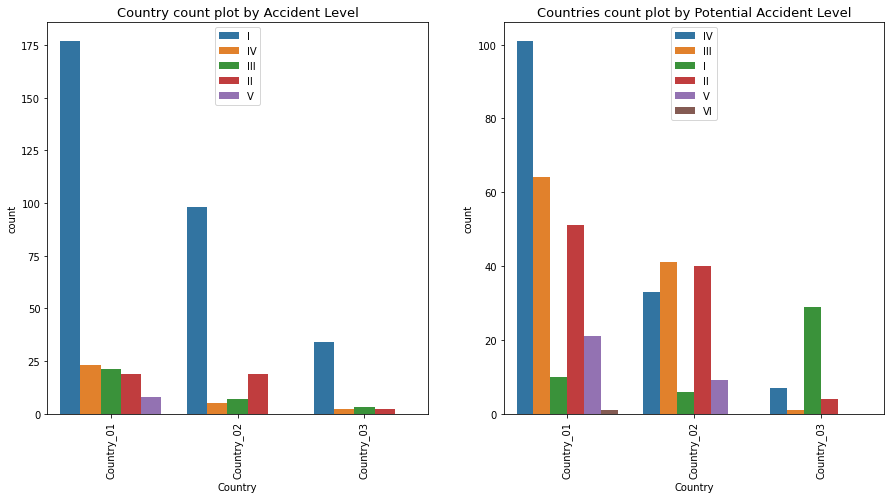

In [66]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(121)
sns.countplot(x = 'Country', data = industry_df, ax = ax, orient = 'v',
                  hue = 'Accident Level').set_title('Country'.capitalize() +' count plot by Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = industry_df['Accident Level'].unique())
plt.xticks(rotation = 90)
    
ax = fig.add_subplot(122)
sns.countplot(x ='Country' , data = industry_df, ax = ax, orient = 'v', 
                  hue = 'Potential Accident Level').set_title('Countries'.capitalize() +' count plot by Potential Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = data['Potential Accident Level'].unique())
plt.xticks(rotation = 90)

In [68]:
# Summary statistics
industry_df.drop(columns='Description').describe(exclude=[np.number]).T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,count,unique,top,freq,first,last
Date,418,287,2017-08-02 00:00:00,6,2016-01-01,2017-12-04
Country,418,3,Country_01,248,NaT,NaT
Local,418,12,Local_03,89,NaT,NaT
Industry Sector,418,3,Mining,237,NaT,NaT
Accident Level,418,5,I,309,NaT,NaT
Potential Accident Level,418,6,IV,141,NaT,NaT
Gender,418,2,Male,396,NaT,NaT
Employee type,418,3,Third Party,185,NaT,NaT
Critical Risk,418,33,Others,229,NaT,NaT
Weekday,418,7,Thursday,76,NaT,NaT


In [69]:
# Check the Correlation
industry_df.corr()

,Year,Month,Day,WeekofYear
Year,1.000000,-0.154650,-0.090633,-0.169290
Month,-0.154650,1.000000,-0.160406,0.966698
Day,-0.090633,-0.160406,1.000000,-0.097496
WeekofYear,-0.169290,0.966698,-0.097496,1.000000
